# Evolution of COVID-19 in China, US, UK, France, Spain and Italy (7/4/2020)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data from Kaggle Novel Corona Virus 2019 Dataset:
#https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data#covid_19_data.csv
df = pd.read_csv(r'C:\Users\Elodie\Documents\R\Covid model\data\covid_19_data2.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [2]:
#filter relevant countries - after exploring for missing values and duplicates
ch = df[df['Country/Region'] == 'Mainland China']
ch_agg = ch.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
ch_agg = ch_agg.reset_index()
us = df[df['Country/Region'] == 'US']
us_agg = us.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
us_agg = us_agg.reset_index()
uk = df[df['Country/Region'] == 'UK']
uk = uk[(uk['Province/State'].isnull()) | (uk['Province/State']=='UK') | (uk['Province/State']=='United Kingdom')]
fr = df[df['Country/Region'] == 'France']
fr = fr[(fr['Province/State'].isnull()) | (fr['Province/State']=='France')]
sp = df[df['Country/Region'] == 'Spain']
it = df[df['Country/Region'] == 'Italy']

#time series start at different dates for each country
#China starts 01/22, US starts 01/22, UK starts 01/31, France starts 01/24, Spain starts 02/01, Italy starts 01/31
#create empty observations for 01/22 - 02/01
miss = pd.DataFrame(columns=['ObservationDate', 'Confirmed', 'Deaths', 'Recovered'])
miss['ObservationDate'] = us_agg['ObservationDate'][0:10]

#add those missing values to uk, fr, sp and it
uk = uk.drop(['SNo','Province/State','Country/Region','Last Update'], axis=1)
uk = miss.append(uk)
uk = uk.drop([9])
fr = fr.drop(['SNo','Province/State','Country/Region','Last Update'], axis=1)
fr = miss.append(fr)
fr = fr.drop(range(2,10))
sp = sp.drop(['SNo','Province/State','Country/Region','Last Update'], axis=1)
sp = miss.append(sp)
it = it.drop(['SNo','Province/State','Country/Region','Last Update'], axis=1)
it = miss.append(it)
it = it.drop([9])

#reset indexes
ch_agg = ch_agg.reset_index()
ch_agg = ch_agg.drop(ch_agg.columns[[0]], axis=1)
us_agg = us_agg.reset_index()
us_agg = us_agg.drop(us_agg.columns[[0]], axis=1)
uk = uk.reset_index()
uk = uk.drop(uk.columns[[0]], axis=1)
fr = fr.reset_index()
fr = fr.drop(fr.columns[[0]], axis=1)
sp = sp.reset_index()
sp = sp.drop(sp.columns[[0]], axis=1)
it = it.reset_index()
it = it.drop(it.columns[[0]], axis=1)

#rename columns
ch_agg = ch_agg.rename(columns={'ObservationDate':'ObservationDate', 'Confirmed':'ch_conf', 'Deaths':'ch_dead', 'Recovered':'ch_rec'})
us_agg = us_agg.rename(columns={'ObservationDate':'v', 'Confirmed':'us_conf', 'Deaths':'us_dead', 'Recovered':'us_rec'})
uk = uk.rename(columns={'ObservationDate':'w', 'Confirmed':'uk_conf', 'Deaths':'uk_dead', 'Recovered':'uk_rec'})
fr = fr.rename(columns={'ObservationDate':'x', 'Confirmed':'fr_conf', 'Deaths':'fr_dead', 'Recovered':'fr_rec'})
sp = sp.rename(columns={'ObservationDate':'y', 'Confirmed':'sp_conf', 'Deaths':'sp_dead', 'Recovered':'sp_rec'})
it = it.rename(columns={'ObservationDate':'z', 'Confirmed':'it_conf', 'Deaths':'it_dead', 'Recovered':'it_rec'})

#merge all countries into one dataframe
df2 = pd.concat((ch_agg, us_agg, uk, fr, sp, it), axis=1)
df2 = df2.drop(['v', 'w', 'x', 'y', 'z'], axis=1)
df2.head(15)

,ObservationDate,ch_conf,ch_dead,ch_rec,us_conf,us_dead,us_rec,uk_conf,uk_dead,uk_rec,fr_conf,fr_dead,fr_rec,sp_conf,sp_dead,sp_rec,it_conf,it_dead,it_rec
0,01/22/2020,547.0,17.0,28.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/23/2020,639.0,18.0,30.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/24/2020,916.0,26.0,36.0,2.0,0.0,0.0,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,01/25/2020,1399.0,42.0,39.0,2.0,0.0,0.0,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,01/26/2020,2062.0,56.0,49.0,5.0,0.0,0.0,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,01/27/2020,2863.0,82.0,58.0,5.0,0.0,0.0,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,01/28/2020,5494.0,131.0,101.0,5.0,0.0,0.0,NaN,NaN,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,01/29/2020,6070.0,133.0,120.0,5.0,0.0,0.0,NaN,NaN,NaN,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,01/30/2020,8124.0,171.0,135.0,5.0,0.0,0.0,NaN,NaN,NaN,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,01/31/2020,9783.0,213.0,214.0,6.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,2.0,0.0,0.0


In [3]:
df2.tail()

,ObservationDate,ch_conf,ch_dead,ch_rec,us_conf,us_dead,us_rec,uk_conf,uk_dead,uk_rec,fr_conf,fr_dead,fr_rec,sp_conf,sp_dead,sp_rec,it_conf,it_dead,it_rec
71,04/02/2020,81589.0,3318.0,76408.0,243453.0,5926.0,9001.0,33718.0,2921.0,135.0,64338.0,6507.0,14008.0,112065.0,10348.0,26743.0,115242.0,13915.0,18278.0
72,04/03/2020,81623.0,3322.0,76577.0,275586.0,7087.0,9707.0,38168.0,3605.0,135.0,89953.0,7560.0,15438.0,119199.0,11198.0,30513.0,119827.0,14681.0,19758.0
73,04/04/2020,81638.0,3326.0,76763.0,308850.0,8407.0,14652.0,41903.0,4313.0,135.0,92839.0,8078.0,16183.0,126168.0,11947.0,34219.0,124632.0,15362.0,20996.0
74,04/05/2020,81668.0,3329.0,76991.0,337072.0,9619.0,17448.0,47806.0,4934.0,135.0,98010.0,8911.0,17250.0,131646.0,12641.0,38080.0,128948.0,15887.0,21815.0
75,04/06/2020,81707.0,3331.0,77084.0,366614.0,10783.0,19581.0,51608.0,5373.0,135.0,NaN,NaN,NaN,136675.0,13341.0,40437.0,132547.0,16523.0,22837.0


The last missing value for France is probably due to data wrangling error (ignore).

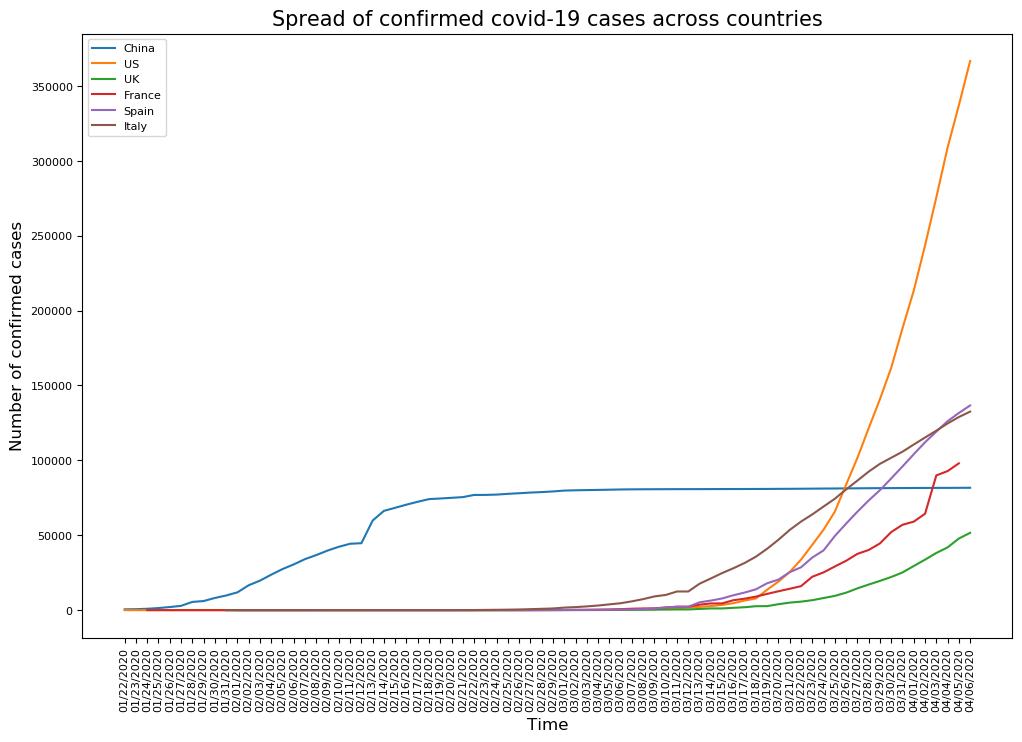

In [25]:
fig, ax = plt.subplots()
ax.plot(df2['ObservationDate'], df2['ch_conf'])
ax.plot(df2['ObservationDate'], df2['us_conf'])
ax.plot(df2['ObservationDate'], df2['uk_conf'])
ax.plot(df2['ObservationDate'], df2['fr_conf'])
ax.plot(df2['ObservationDate'], df2['sp_conf'])
ax.plot(df2['ObservationDate'], df2['it_conf'])
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of confirmed cases', fontsize=12)
plt.xticks(rotation=90)
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'])
plt.title('Spread of confirmed covid-19 cases across countries', fontsize=15)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 9})
plt.show()

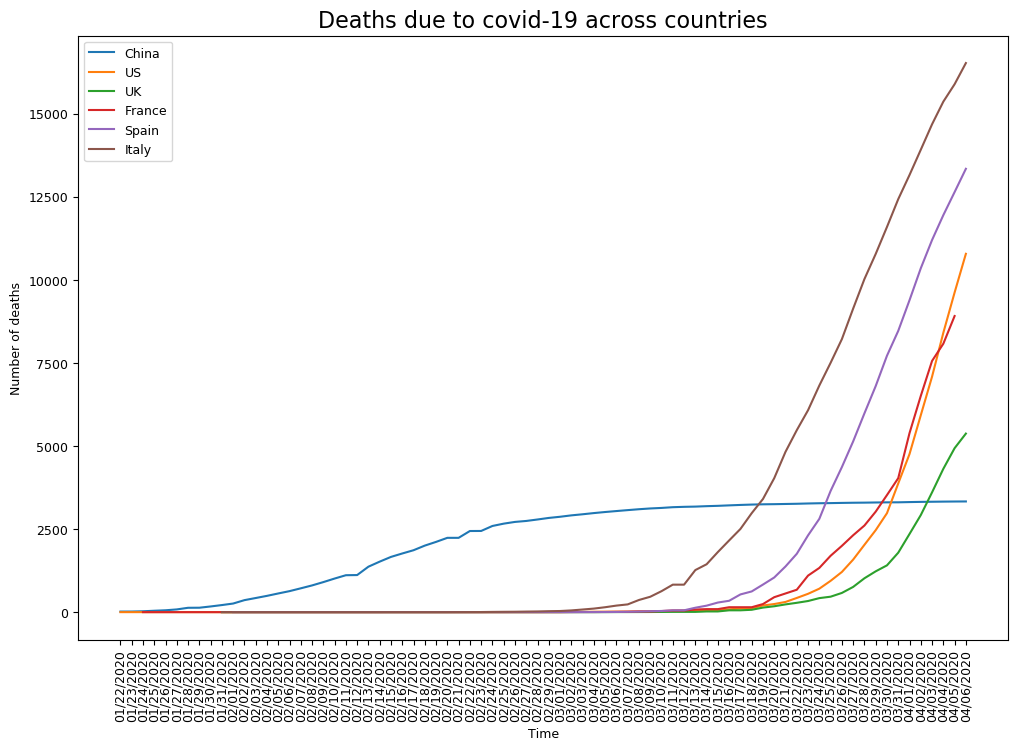

In [5]:
fig, ax = plt.subplots()
ax.plot(df2['ObservationDate'], df2['ch_dead'])
ax.plot(df2['ObservationDate'], df2['us_dead'])
ax.plot(df2['ObservationDate'], df2['uk_dead'])
ax.plot(df2['ObservationDate'], df2['fr_dead'])
ax.plot(df2['ObservationDate'], df2['sp_dead'])
ax.plot(df2['ObservationDate'], df2['it_dead'])
ax.set_xlabel('Time')
ax.set_ylabel('Number of deaths')
plt.xticks(rotation=90)
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'])
plt.title('Deaths due to covid-19 across countries',fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 9})
plt.show()

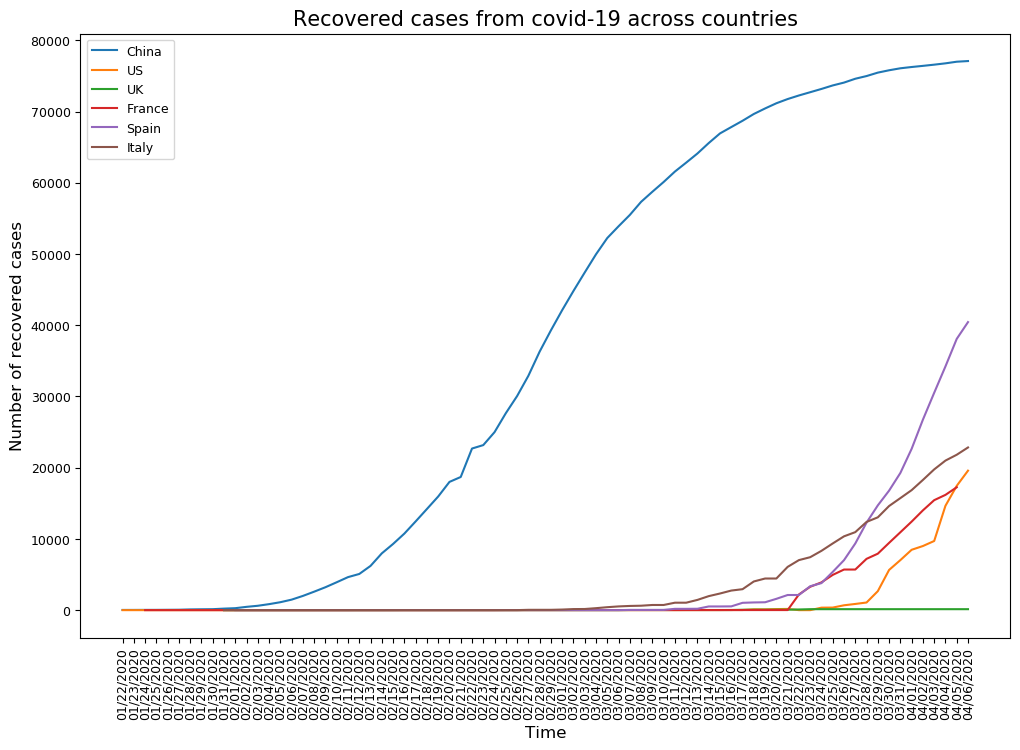

In [6]:
fig, ax = plt.subplots()
ax.plot(df2['ObservationDate'], df2['ch_rec'])
ax.plot(df2['ObservationDate'], df2['us_rec'])
ax.plot(df2['ObservationDate'], df2['uk_rec'])
ax.plot(df2['ObservationDate'], df2['fr_rec'])
ax.plot(df2['ObservationDate'], df2['sp_rec'])
ax.plot(df2['ObservationDate'], df2['it_rec'])
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of recovered cases', fontsize=12)
plt.xticks(rotation=90)
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'])
plt.title('Recovered cases from covid-19 across countries', fontsize=15)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 9})
plt.show()

# Spead of the virus (adjusting for population size)

In [7]:
#China: 1,438,039,418. US: 330,553,081. UK: 67,803,473. France: 65,240,199. Spain: 46,750,610. Italy: 60482243 (worldometers)
df2['ch_conf%'] = df2['ch_conf'] / 1438039418 *100
df2['ch_dead%'] = df2['ch_dead'] / 1438039418 *100
df2['us_conf%'] = df2['us_conf'] / 330553081 *100
df2['us_dead%'] = df2['us_dead'] / 330553081 *100
df2['uk_conf%'] = df2['uk_conf'] / 67803473 *100
df2['uk_dead%'] = df2['uk_dead'] / 67803473 *100
df2['fr_conf%'] = df2['fr_conf'] / 65240199 *100
df2['fr_dead%'] = df2['fr_dead'] / 65240199 *100
df2['sp_conf%'] = df2['sp_conf'] / 46750610 *100
df2['sp_dead%'] = df2['sp_dead'] / 46750610 *100
df2['it_conf%'] = df2['sp_conf'] / 60482243 *100
df2['it_dead%'] = df2['sp_dead'] / 60482243 *100
df2.tail()

,ObservationDate,ch_conf,ch_dead,ch_rec,us_conf,us_dead,us_rec,uk_conf,uk_dead,uk_rec,...,us_conf%,us_dead%,uk_conf%,uk_dead%,fr_conf%,fr_dead%,sp_conf%,sp_dead%,it_conf%,it_dead%
71,04/02/2020,81589.0,3318.0,76408.0,243453.0,5926.0,9001.0,33718.0,2921.0,135.0,...,0.073650,0.001793,0.049729,0.004308,0.098617,0.009974,0.239708,0.022134,0.185286,0.017109
72,04/03/2020,81623.0,3322.0,76577.0,275586.0,7087.0,9707.0,38168.0,3605.0,135.0,...,0.083371,0.002144,0.056292,0.005317,0.137880,0.011588,0.254968,0.023953,0.197081,0.018515
73,04/04/2020,81638.0,3326.0,76763.0,308850.0,8407.0,14652.0,41903.0,4313.0,135.0,...,0.093434,0.002543,0.061801,0.006361,0.142303,0.012382,0.269875,0.025555,0.208603,0.019753
74,04/05/2020,81668.0,3329.0,76991.0,337072.0,9619.0,17448.0,47806.0,4934.0,135.0,...,0.101972,0.002910,0.070507,0.007277,0.150229,0.013659,0.281592,0.027039,0.217661,0.020900
75,04/06/2020,81707.0,3331.0,77084.0,366614.0,10783.0,19581.0,51608.0,5373.0,135.0,...,0.110909,0.003262,0.076114,0.007924,NaN,NaN,0.292349,0.028537,0.225975,0.022058


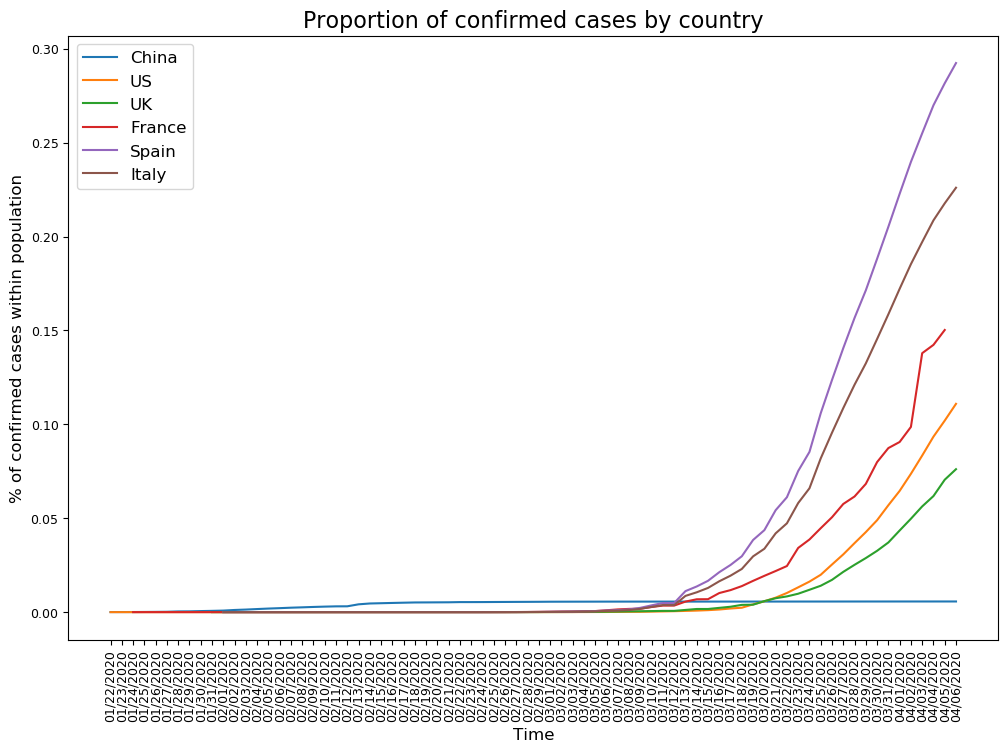

In [8]:
fig, ax = plt.subplots()
ax.plot(df2['ObservationDate'], df2['ch_conf%'])
ax.plot(df2['ObservationDate'], df2['us_conf%'])
ax.plot(df2['ObservationDate'], df2['uk_conf%'])
ax.plot(df2['ObservationDate'], df2['fr_conf%'])
ax.plot(df2['ObservationDate'], df2['sp_conf%'])
ax.plot(df2['ObservationDate'], df2['it_conf%'])
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('% of confirmed cases within population', fontsize=12)
plt.xticks(rotation=90)
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'], fontsize=12)
plt.title('Proportion of confirmed cases by country', fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 8})
plt.show()

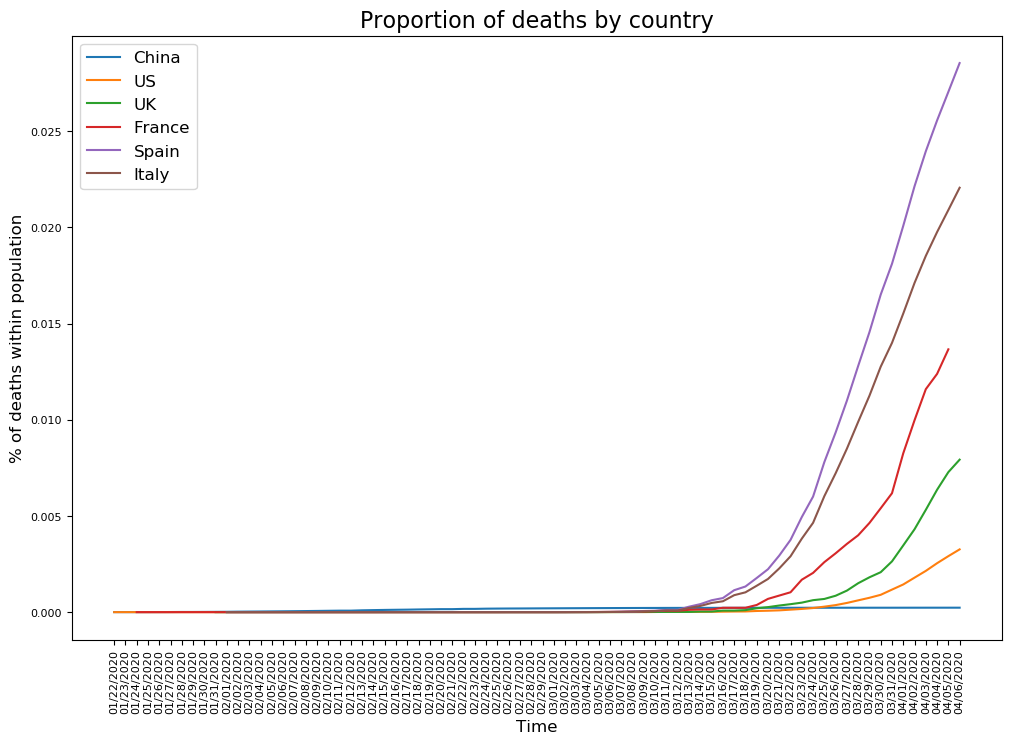

In [9]:
fig, ax = plt.subplots()
ax.plot(df2['ObservationDate'], df2['ch_dead%'])
ax.plot(df2['ObservationDate'], df2['us_dead%'])
ax.plot(df2['ObservationDate'], df2['uk_dead%'])
ax.plot(df2['ObservationDate'], df2['fr_dead%'])
ax.plot(df2['ObservationDate'], df2['sp_dead%'])
ax.plot(df2['ObservationDate'], df2['it_dead%'])
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('% of deaths within population', fontsize=12)
plt.xticks(rotation=90)
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'], fontsize=12)
plt.title('Proportion of deaths by country', fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 8})
plt.show()

These two charts are very similar. Adjusting for population size, the countries who have the highest % of confirmed cases also have the highest % of deaths (which is sensible). From this perspective, Spain and Italy are worsely affected.

# Match the start of the epidemic in each country

In [10]:
#confirmed cases: ch rises from 01/22, us from 03/08, uk from 03/13, fr from 03/07, sp from 03/08, it from 02/26
us_agg = us_agg.iloc[46:]
uk = uk.iloc[51:]
fr = fr.iloc[45:]
sp = sp.iloc[46:]
it = it.iloc[35:] 

#reset indexes
ch_agg = ch_agg.reset_index()
ch_agg = ch_agg.drop(ch_agg.columns[[0]], axis=1)
us_agg = us_agg.reset_index()
us_agg = us_agg.drop(us_agg.columns[[0]], axis=1)
uk = uk.reset_index()
uk = uk.drop(uk.columns[[0]], axis=1)
fr = fr.reset_index()
fr = fr.drop(fr.columns[[0]], axis=1)
sp = sp.reset_index()
sp = sp.drop(sp.columns[[0]], axis=1)
it = it.reset_index()
it = it.drop(it.columns[[0]], axis=1)

df3 = pd.concat((ch_agg, us_agg, uk, fr, sp, it), axis=1)
df3 = df3.drop(['v', 'w', 'x', 'y', 'z'], axis=1)
df3.head()
#ObservationDate is only true for China, but I need to keep a variable to plot on the x-axis

,ObservationDate,ch_conf,ch_dead,ch_rec,us_conf,us_dead,us_rec,uk_conf,uk_dead,uk_rec,fr_conf,fr_dead,fr_rec,sp_conf,sp_dead,sp_rec,it_conf,it_dead,it_rec
0,01/22/2020,547.0,17.0,28.0,537.0,21.0,8.0,798.0,8.0,18.0,949.0,11.0,12.0,673.0,17.0,30.0,453.0,12.0,3.0
1,01/23/2020,639.0,18.0,30.0,605.0,22.0,8.0,1140.0,21.0,18.0,1126.0,19.0,12.0,1073.0,28.0,32.0,655.0,17.0,45.0
2,01/24/2020,916.0,26.0,36.0,959.0,28.0,8.0,1140.0,21.0,18.0,1209.0,19.0,12.0,1695.0,35.0,32.0,888.0,21.0,46.0
3,01/25/2020,1399.0,42.0,39.0,1281.0,36.0,8.0,1543.0,55.0,20.0,1784.0,33.0,12.0,2277.0,54.0,183.0,1128.0,29.0,46.0
4,01/26/2020,2062.0,56.0,49.0,1663.0,40.0,12.0,1950.0,55.0,52.0,2281.0,48.0,12.0,2277.0,55.0,183.0,1694.0,34.0,83.0


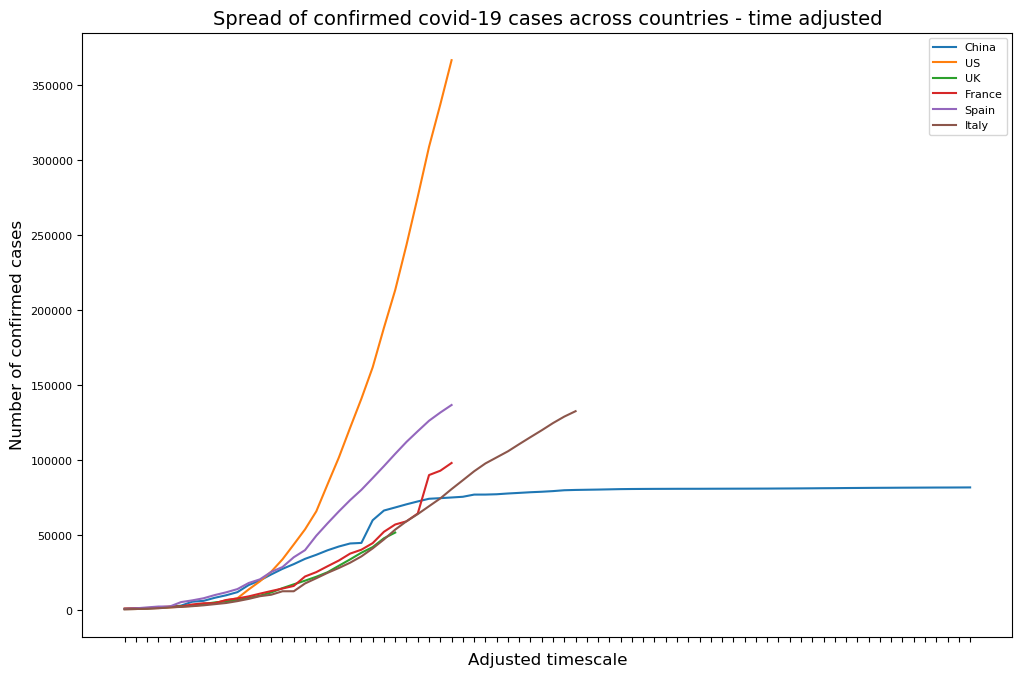

In [11]:
fig, ax = plt.subplots()
ax.plot(df3['ObservationDate'], df3['ch_conf'])
ax.plot(df3['ObservationDate'], df3['us_conf'])
ax.plot(df3['ObservationDate'], df3['uk_conf'])
ax.plot(df3['ObservationDate'], df3['fr_conf'])
ax.plot(df3['ObservationDate'], df3['sp_conf'])
ax.plot(df3['ObservationDate'], df3['it_conf'])
ax.set_xlabel('Adjusted timescale', fontsize=12)
ax.set_ylabel('Number of confirmed cases', fontsize=12)
ax.set_xticklabels([])
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'])
plt.title('Spread of confirmed covid-19 cases across countries - time adjusted', fontsize=14)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 12})
plt.show()

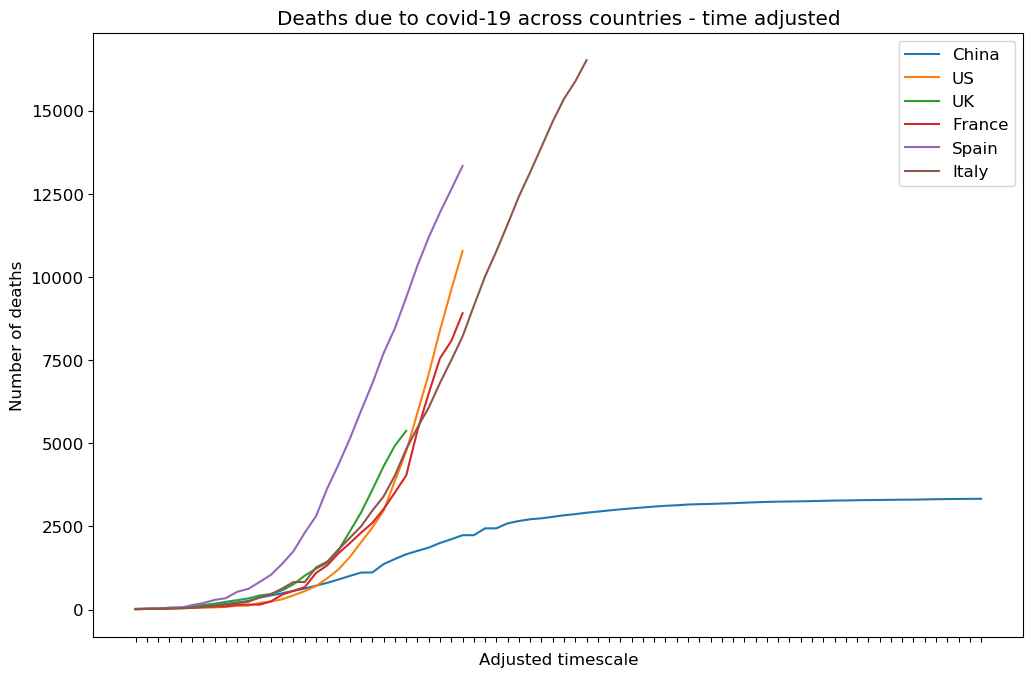

In [12]:
fig, ax = plt.subplots()
ax.plot(df3['ObservationDate'], df3['ch_dead'])
ax.plot(df3['ObservationDate'], df3['us_dead'])
ax.plot(df3['ObservationDate'], df3['uk_dead'])
ax.plot(df3['ObservationDate'], df3['fr_dead'])
ax.plot(df3['ObservationDate'], df3['sp_dead'])
ax.plot(df3['ObservationDate'], df3['it_dead'])
ax.set_xlabel('Adjusted timescale')
ax.set_ylabel('Number of deaths')
ax.set_xticklabels([])
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'])
plt.title('Deaths due to covid-19 across countries - time adjusted')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 12})
plt.show()

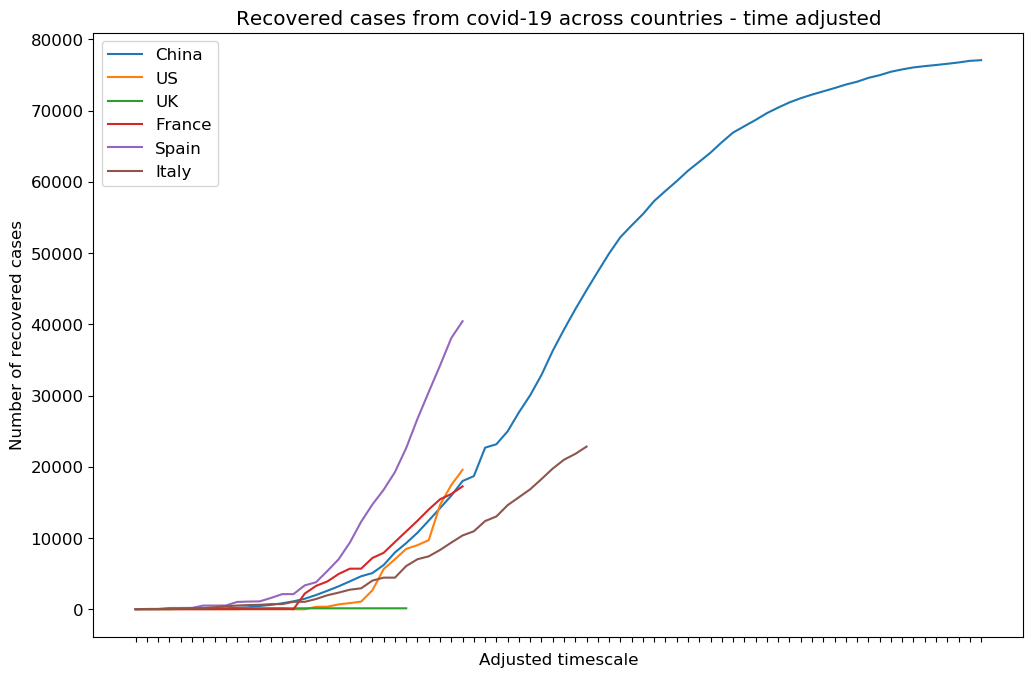

In [13]:
fig, ax = plt.subplots()
ax.plot(df3['ObservationDate'], df3['ch_rec'])
ax.plot(df3['ObservationDate'], df3['us_rec'])
ax.plot(df3['ObservationDate'], df3['uk_rec'])
ax.plot(df3['ObservationDate'], df3['fr_rec'])
ax.plot(df3['ObservationDate'], df3['sp_rec'])
ax.plot(df3['ObservationDate'], df3['it_rec'])
ax.set_xlabel('Adjusted timescale')
ax.set_ylabel('Number of recovered cases')
ax.set_xticklabels([])
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'])
plt.title('Recovered cases from covid-19 across countries - time adjusted')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 12})
plt.show()

These graphs illustrate the importance of flattening the curve (see China). Adjusting for time, the US has twice the number of cases compared to China within the same timeframe. This is because the spread of the virus grows faster in the US. However, this data is very unreliable because countries might decide to report the number of cases differently. They might also test on a different scale. So, the true number of people who have the virus and the number of deaths are underestimated in each country. This largely flaws any comparison across countries. One important question is whether the virus is truly slowing in China or whether this is due to inaccurate data. This is important if other countries take China as an example and hope to reach a slower rate of the disease progression. This data is insufficient to claim that China handled the virus better than other countries.

# Government responses

In [14]:
#data from Oxford covid-19 government response tracker:
#https://www.bsg.ox.ac.uk/research/research-projects/oxford-covid-19-government-response-tracker
df4 = pd.read_excel(r'C:\Users\Elodie\Documents\R\Covid model\data\Oxford_government_response_tracker2.xlsx')
df4['Date'] = df4['Date'].astype(str)
df4 = df4.drop(['Unnamed: 34'], axis=1)
df4.head()

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,...,S8_Notes,S9_Monetary measures,S9_Notes,S10_Emergency investment in health care,S10_Notes,S11_Investment in Vaccines,S11_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex
0,Afghanistan,AFG,20200101,0.0,1.0,https://en.unesco.org/themes/education-emergen...,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0
1,Angola,AGO,20200101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0
2,United Arab Emirates,ARE,20200101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,Argentina,ARG,20200101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,55.0,http://www.bcra.gov.ar/Institucional/Tasa_de_p...,0.0,NaN,0.0,NaN,NaN,NaN,0.0
4,Armenia,ARM,20200101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [15]:
df4.columns

Index(['CountryName', 'CountryCode', 'Date', 'S1_School closing',
       'S1_IsGeneral', 'S1_Notes', 'S2_Workplace closing', 'S2_IsGeneral',
       'S2_Notes', 'S3_Cancel public events', 'S3_IsGeneral', 'S3_Notes',
       'S4_Close public transport', 'S4_IsGeneral', 'S4_Notes',
       'S5_Public information campaigns', 'S5_IsGeneral', 'S5_Notes',
       'S6_Restrictions on internal movement', 'S6_IsGeneral', 'S6_Notes',
       'S7_International travel controls', 'S7_Notes', 'S8_Fiscal measures',
       'S8_Notes', 'S9_Monetary measures', 'S9_Notes',
       'S10_Emergency investment in health care', 'S10_Notes',
       'S11_Investment in Vaccines', 'S11_Notes', 'ConfirmedCases',
       'ConfirmedDeaths', 'StringencyIndex'],
      dtype='object')

Decided not to investigate S1-S11 variables, focus on stringency index for overall situation.

## Stringency index across countries

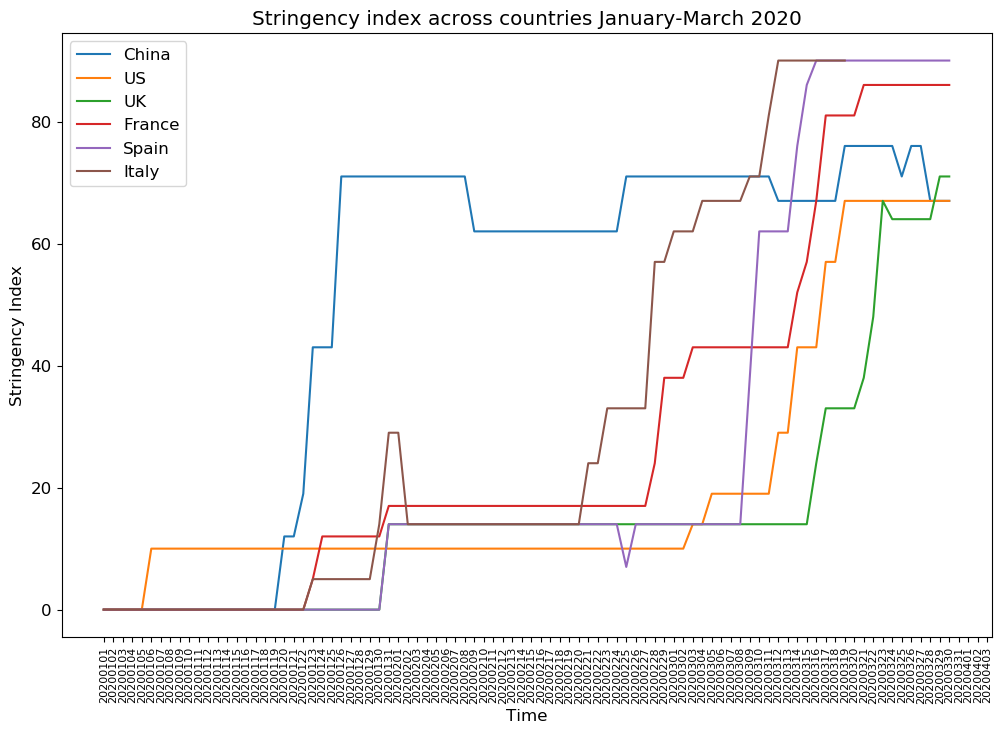

In [16]:
#compare stringency index across countries
ch2 = df4[df4['CountryName'] == 'China']
ch2 = ch2.reset_index()
ch2 = ch2.drop(ch2.columns[[0]], axis=1)
us2 = df4[df4['CountryName'] == 'United States']
us2 = us2.reset_index()
us2 = us2.drop(us2.columns[[0]], axis=1)
uk2 = df4[df4['CountryName'] == 'United Kingdom']
uk2 = uk2.reset_index()
uk2 = uk2.drop(uk2.columns[[0]], axis=1)
fr2 = df4[df4['CountryName'] == 'France']
fr2 = fr2.reset_index()
fr2 = fr2.drop(fr2.columns[[0]], axis=1)
sp2 = df4[df4['CountryName'] == 'Spain']
sp2 = sp2.reset_index()
sp2 = sp2.drop(sp2.columns[[0]], axis=1)
it2 = df4[df4['CountryName'] == 'Italy']
it2 = it2.reset_index()
it2 = it2.drop(it2.columns[[0]], axis=1)

df5 = pd.DataFrame(columns=['date', 'str_ch', 'str_us', 'str_uk', 'str_fr', 'str_sp', 'str_it'])
df5['date'] = sp2['Date']
df5['str_ch'] = ch2['StringencyIndex']
df5['str_us'] = us2['StringencyIndex']
df5['str_uk'] = uk2['StringencyIndex']
df5['str_fr'] = fr2['StringencyIndex']
df5['str_sp'] = sp2['StringencyIndex']
df5['str_it'] = it2['StringencyIndex']
#add missing dates values (31/03 - 6/04) to Oxford time series - create new df
df7 = pd.DataFrame(columns=['date', 'str_ch', 'str_us', 'str_uk', 'str_fr', 'str_sp', 'str_it'])
df7['date'] = ['20200401', '20200402', '20200403', '20200404', '20200405', '20200406']
#merge those missing dates
df5 = pd.concat([df5, df7], sort=False)
df5 = df5.reset_index()
df5 = df5.drop(df5.columns[[0]], axis=1)

fig, ax = plt.subplots()
ax.plot(df5['date'], df5['str_ch'])
ax.plot(df5['date'], df5['str_us'])
ax.plot(df5['date'], df5['str_uk'])
ax.plot(df5['date'], df5['str_fr'])
ax.plot(df5['date'], df5['str_sp'])
ax.plot(df5['date'], df5['str_it'])
ax.set_xlabel('Time')
ax.set_ylabel('Stringency Index')
plt.xticks(rotation=90)
plt.tick_params(axis = 'x', which = 'major', labelsize = 8)
plt.legend(['China', 'US', 'UK', 'France', 'Spain', 'Italy'])
plt.title('Stringency index across countries January-March 2020')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 12})
plt.show()

The Chinese government reacted earlier as China was the first country being hit by the virus. The other countries reacted one after the other, rapidly increasing containment measures.  On 30/3/2020, there are two groups: Spain, Italy and France implemented stricter confinement measures. The US, the UK and China implemented slighty less extreme measures. The US and the UK were the last to increase stringency measures. The US is currently the most affected country; the rate of disease progression and the increase in deaths is steep. The UK is less severely hit, although the government seems to have changed its original strategy.

## Stringency index within countries - what makes government react?

In [17]:
#comparing countries stringency index with the spread of the virus in each country
#start with virus spread, add empty observations 1/01 - 21/01 to match start of stringency index time series
df6 = pd.DataFrame(columns=['ObservationDate', 'ch_conf', 'ch_dead', 'ch_rec', 'us_conf', 'us_dead', 'us_rec',
                            'uk_conf', 'uk_dead', 'uk_rec', 'fr_conf', 'fr_dead', 'fr_rec',
                            'sp_conf', 'sp_dead', 'sp_rec', 'it_conf', 'it_dead', 'it_rec'])
df6['ObservationDate'] = range(1,22)
df6 = pd.concat([df6, df2], sort=False)
df6 = df6.reset_index()
df6 = df6.drop(df6.columns[[0]], axis=1)
#add stringency index
df6 = pd.concat([df6, df5], axis=1, sort=False)
df6 = df6.reset_index()
df6 = df6.drop(df6.columns[[0]], axis=1)
df6.tail(10)

,ObservationDate,ch_conf,ch_dead,ch_rec,us_conf,us_dead,us_rec,uk_conf,uk_dead,uk_rec,...,sp_dead%,it_conf%,it_dead%,date,str_ch,str_us,str_uk,str_fr,str_sp,str_it
87,03/28/2020,81401.0,3295.0,74978.0,121478.0,2026.0,1072.0,17089.0,1019.0,135.0,...,0.012796,0.121085,0.009891,20200328,67.0,67.0,64.0,86.0,90.0,NaN
88,03/29/2020,81444.0,3300.0,75460.0,140886.0,2467.0,2665.0,19522.0,1228.0,135.0,...,0.014552,0.132452,0.011248,20200329,67.0,67.0,71.0,86.0,90.0,NaN
89,03/30/2020,81478.0,3304.0,75790.0,161807.0,2978.0,5644.0,22141.0,1408.0,135.0,...,0.016505,0.145425,0.012757,20200330,67.0,67.0,71.0,86.0,90.0,NaN
90,03/31/2020,81524.0,3305.0,76068.0,188172.0,3873.0,7024.0,25150.0,1789.0,135.0,...,0.018105,0.158597,0.013994,20200331,NaN,NaN,NaN,NaN,NaN,NaN
91,04/01/2020,81555.0,3312.0,76248.0,213372.0,4757.0,8474.0,29474.0,2352.0,135.0,...,0.020079,0.172146,0.015520,20200401,NaN,NaN,NaN,NaN,NaN,NaN
92,04/02/2020,81589.0,3318.0,76408.0,243453.0,5926.0,9001.0,33718.0,2921.0,135.0,...,0.022134,0.185286,0.017109,20200402,NaN,NaN,NaN,NaN,NaN,NaN
93,04/03/2020,81623.0,3322.0,76577.0,275586.0,7087.0,9707.0,38168.0,3605.0,135.0,...,0.023953,0.197081,0.018515,20200403,NaN,NaN,NaN,NaN,NaN,NaN
94,04/04/2020,81638.0,3326.0,76763.0,308850.0,8407.0,14652.0,41903.0,4313.0,135.0,...,0.025555,0.208603,0.019753,20200404,NaN,NaN,NaN,NaN,NaN,NaN
95,04/05/2020,81668.0,3329.0,76991.0,337072.0,9619.0,17448.0,47806.0,4934.0,135.0,...,0.027039,0.217661,0.020900,20200405,NaN,NaN,NaN,NaN,NaN,NaN
96,04/06/2020,81707.0,3331.0,77084.0,366614.0,10783.0,19581.0,51608.0,5373.0,135.0,...,0.028537,0.225975,0.022058,20200406,NaN,NaN,NaN,NaN,NaN,NaN


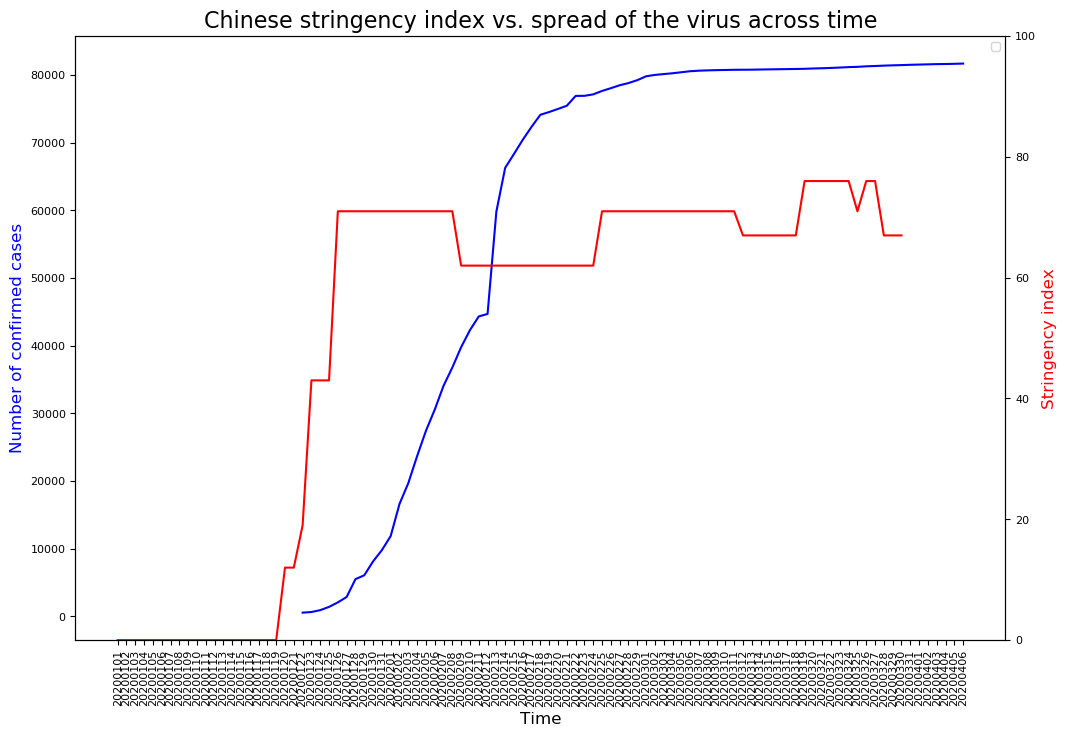

In [24]:
fig, ax = plt.subplots()
ax.plot(df6.date, df6.ch_conf, color='blue')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of confirmed cases', color='blue', fontsize=12)
plt.xticks(rotation=90)
#twin object for two different y-axis
ax2=ax.twinx()
#make a plot with different y-axis using second axis object
ax2.plot(df6.date, df6.str_ch, color='red')
ax2.set_ylabel('Stringency index', color='red', fontsize=12)
ax2.set_ylim([0,100])
plt.legend([])
plt.title('Chinese stringency index vs. spread of the virus across time', fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 8})
plt.show()

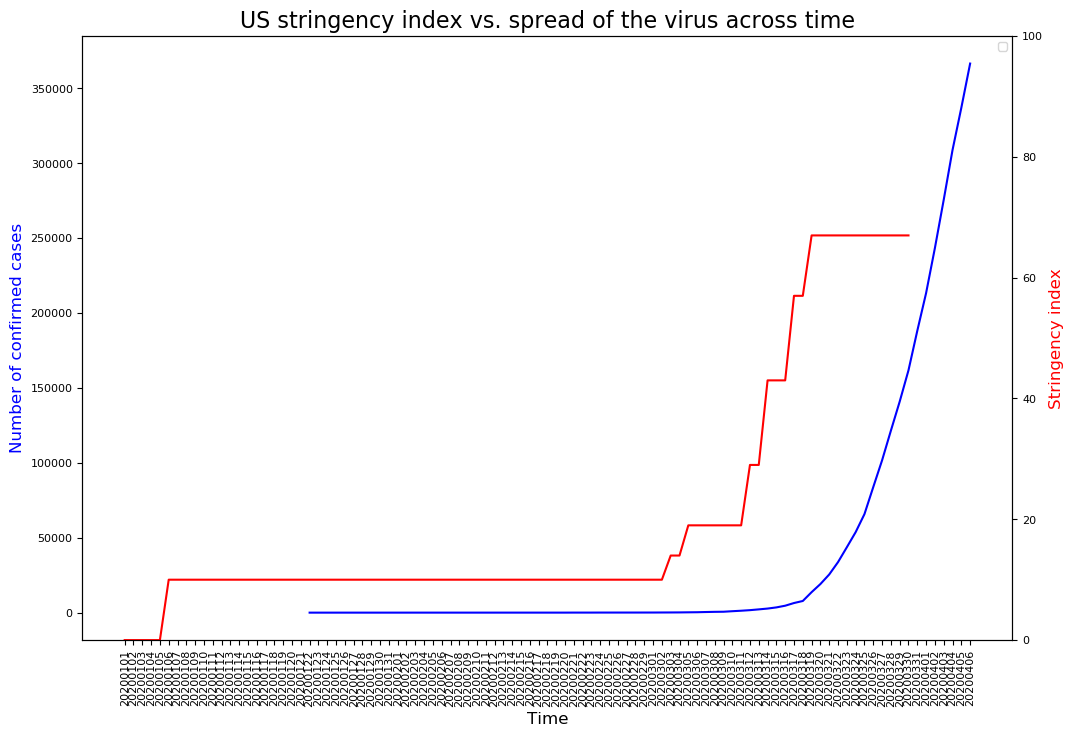

In [19]:
fig, ax = plt.subplots()
ax.plot(df6.date, df6.us_conf, color='blue')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of confirmed cases', color='blue', fontsize=12)
plt.xticks(rotation=90)
#twin object for two different y-axis
ax2=ax.twinx()
#make a plot with different y-axis using second axis object
ax2.plot(df6.date, df6.str_us, color='red')
ax2.set_ylabel('Stringency index', color='red', fontsize=12)
ax2.set_ylim([0,100])
plt.legend([])
plt.title('US stringency index vs. spread of the virus across time', fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 8})
plt.show()

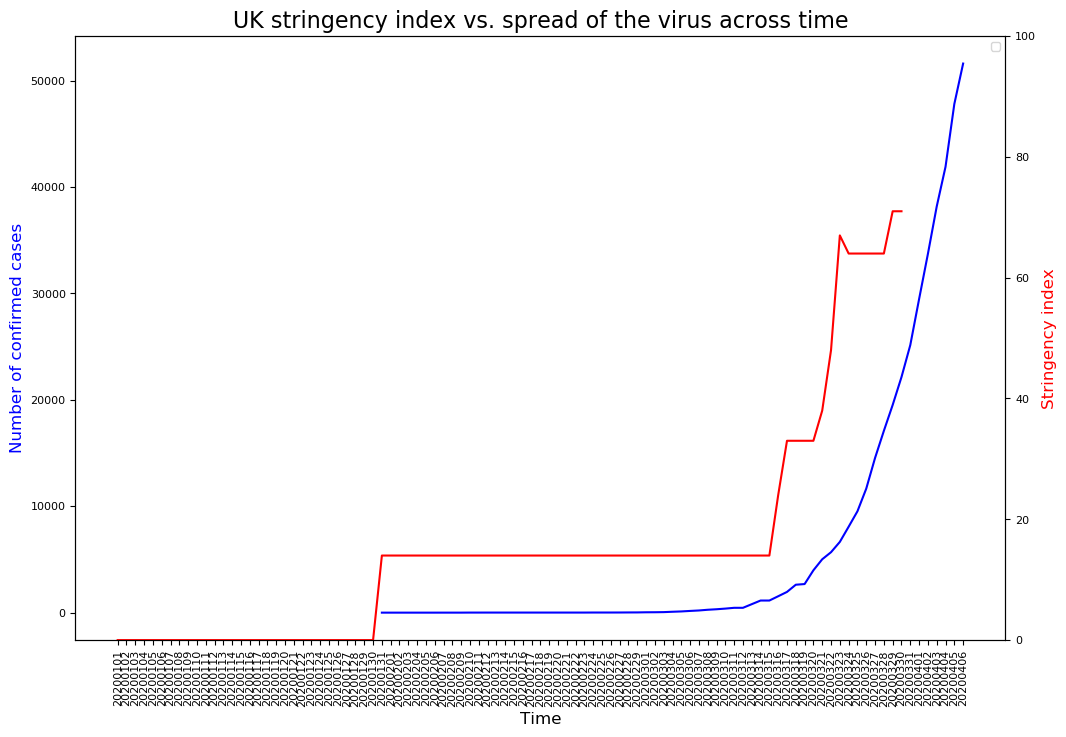

In [20]:
fig, ax = plt.subplots()
ax.plot(df6.date, df6.uk_conf, color='blue')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of confirmed cases', color='blue', fontsize=12)
plt.xticks(rotation=90)
#twin object for two different y-axis
ax2=ax.twinx()
#make a plot with different y-axis using second axis object
ax2.plot(df6.date, df6.str_uk, color='red')
ax2.set_ylabel('Stringency index', color='red', fontsize=12)
ax2.set_ylim([0,100])
plt.legend([])
plt.title('UK stringency index vs. spread of the virus across time', fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 8})
plt.show()

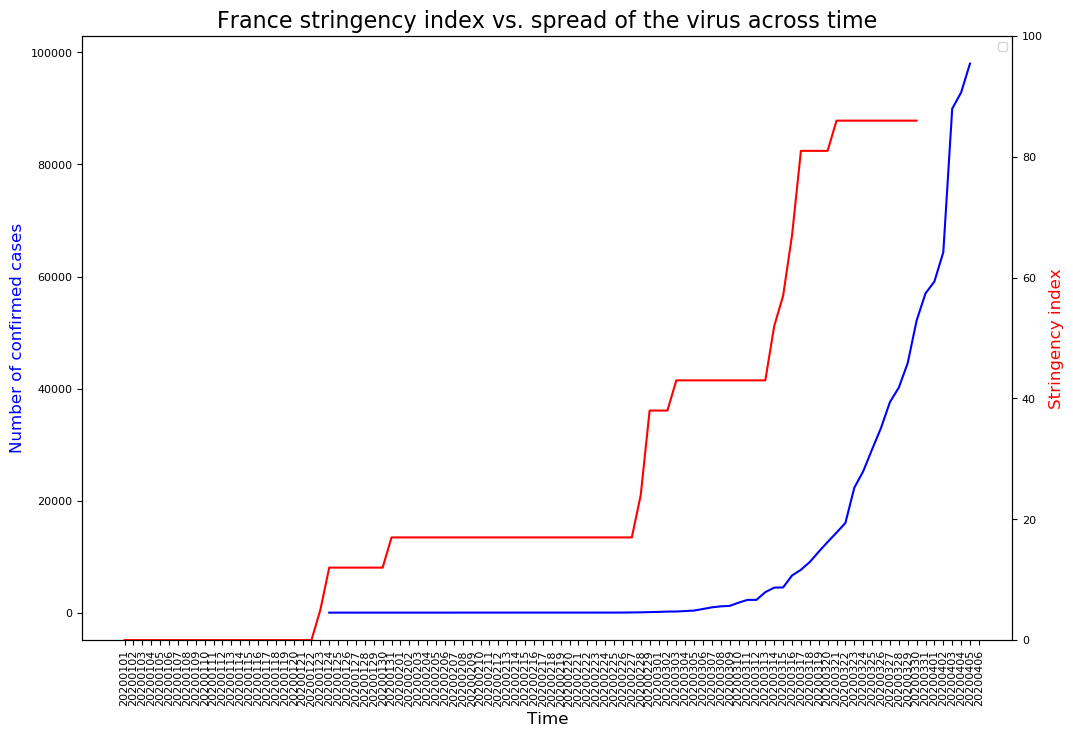

In [21]:
fig, ax = plt.subplots()
ax.plot(df6.date, df6.fr_conf, color='blue')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of confirmed cases', color='blue', fontsize=12)
plt.xticks(rotation=90)
#twin object for two different y-axis
ax2=ax.twinx()
#make a plot with different y-axis using second axis object
ax2.plot(df6.date, df6.str_fr, color='red')
ax2.set_ylabel('Stringency index', color='red', fontsize=12)
ax2.set_ylim([0,100])
plt.legend([])
plt.title('France stringency index vs. spread of the virus across time', fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 8})
plt.show()

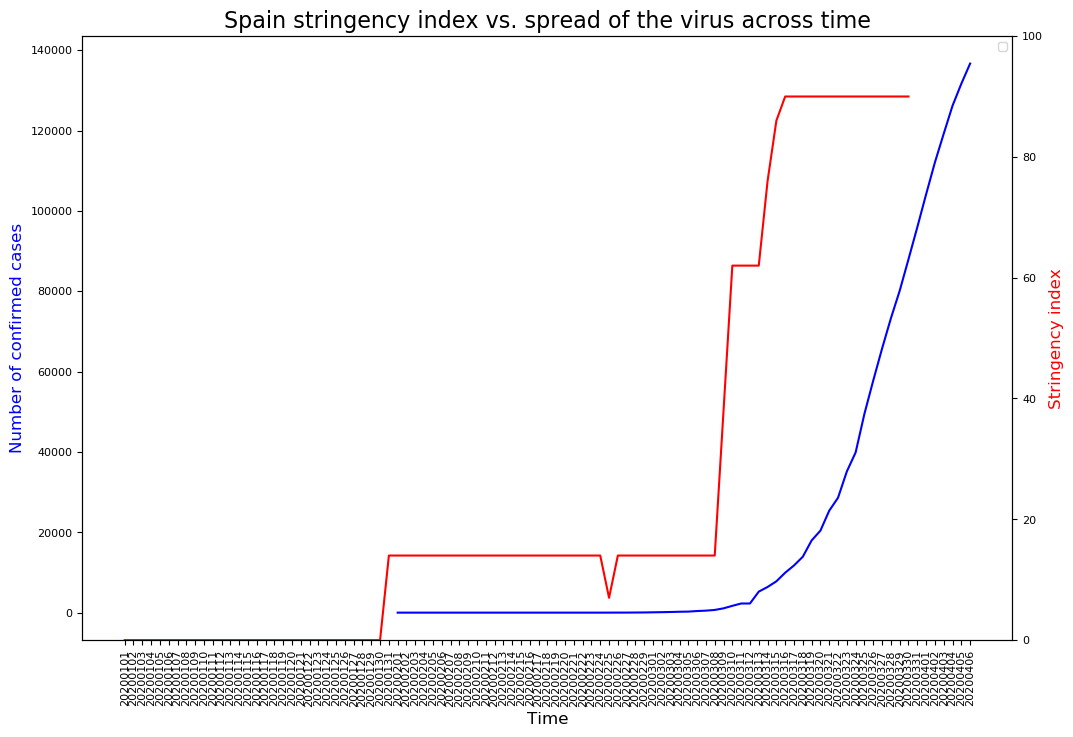

In [22]:
fig, ax = plt.subplots()
ax.plot(df6.date, df6.sp_conf, color='blue')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of confirmed cases', color='blue', fontsize=12)
plt.xticks(rotation=90)
#twin object for two different y-axis
ax2=ax.twinx()
#make a plot with different y-axis using second axis object
ax2.plot(df6.date, df6.str_sp, color='red')
ax2.set_ylabel('Stringency index', color='red', fontsize=12)
ax2.set_ylim([0,100])
plt.legend([])
plt.title('Spain stringency index vs. spread of the virus across time', fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 8})
plt.show()

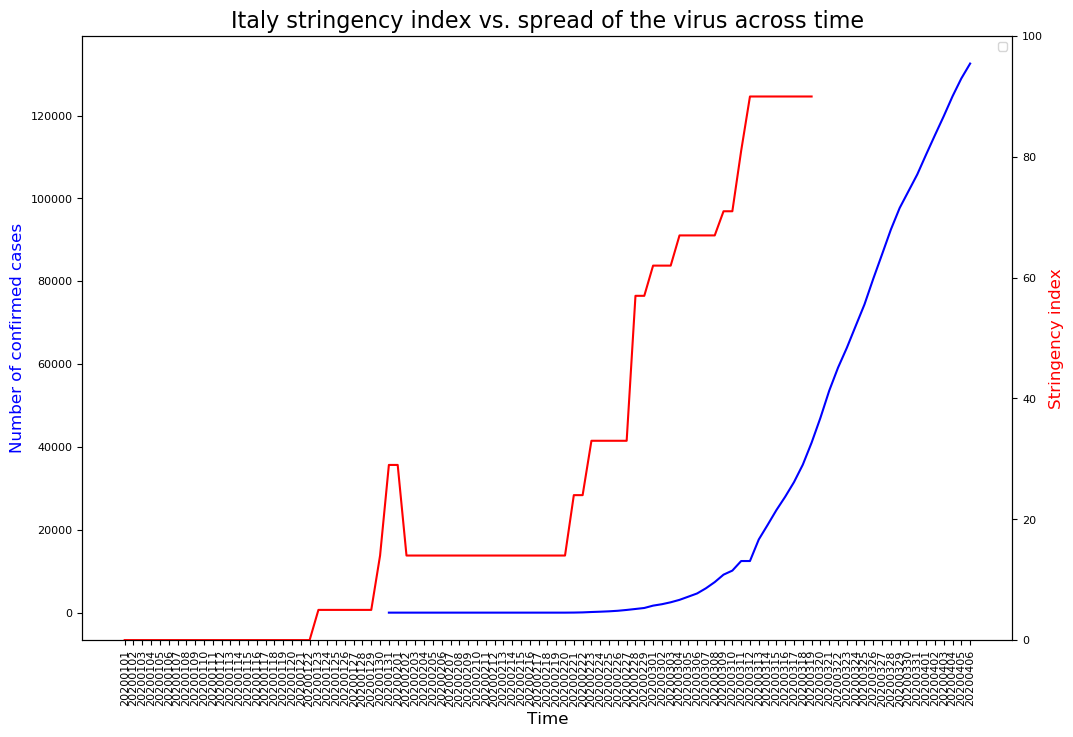

In [23]:
fig, ax = plt.subplots()
ax.plot(df6.date, df6.it_conf, color='blue')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of confirmed cases', color='blue', fontsize=12)
plt.xticks(rotation=90)
#twin object for two different y-axis
ax2=ax.twinx()
#make a plot with different y-axis using second axis object
ax2.plot(df6.date, df6.str_it, color='red')
ax2.set_ylabel('Stringency index', color='red', fontsize=12)
ax2.set_ylim([0,100])
plt.legend([])
plt.title('Italy stringency index vs. spread of the virus across time', fontsize=16)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 8})
plt.show()

Caution: the interpretation of those graphs largely depends on the scale of the blue lines, which obviously can be changed to tell different stories. This is because an exponential curve looks flatter when you zoom out. These graphs are not a very good way to compare the stringency index and the spread of the virus in each country. Better alternatives are welcome!


Using the current scale (specific to each country):

* It looks like the red curve roughly has a similar shape to the blue curve for each country, except that the red curve is shifted to the left. What this means is that governments respond to the number of new cases, with a time delay. In fact, these 6 governments tended to react before the virus escalated. It suggests that governments use reported statistics (even though they know there is undermeasurement). Now, how big is the time lag between government responses and the progression of the virus? The UK seems to have waited for cases to increase before taking action. On the other hand, Italy reacted earlier by rapidly imposing strict measures. Spain seems to have waited close to the outbreak before rapidly implementing strict confinement measures. China rapidly increased and maintained stringency measures, but these measures are not as strict as other contries. The US and the UK seem to have stopped at the same level of stringency, however their number of cases now overtook the growth in the stringency index. On the other hand, the number of cases is plateauing in China, suggesting that these early measures were sufficient to control the spread of the virus in China (based on reported cases).